# PARAMETER FITTING EXERCISES AND SOLUTIONS

# Preliminaries

## Installs

In [1]:
IS_COLAB = True

In [2]:
if IS_COLAB:
    !pip install -q SBStoat
    !pip install -q tellurium
    pass

## Imports

In [3]:
# Python packages used in this chapter
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import os
import pandas as pd
import urllib.request # use this library to download file from GitHub
from SBstoat.namedTimeseries import NamedTimeseries, TIME
from SBstoat.modelFitter import ModelFitter
import SBstoat
import tellurium as te

## Helper Functions
The helper functions reside in the course github repositor in the ``src`` folder. The codes below import these modules into the notebook.

In [ ]:
def getSharedCodes(moduleName):
  """
  Obtains common codes from the github repository.

  Parameters
  ----------
  moduleName: str
      name of the python module in the src directory
  """
  if IS_COLAB:
      url = "https://github.com/sys-bio/network-modeling-summer-school-2021/raw/main/src/%s.py" % moduleName
      local_python = "python.py"
      _, _ = urllib.request.urlretrieve(url=url, filename=local_python)
  else:
      local_python = "../../src/%s.py" % moduleName
  with open(local_python, "r") as fd:
    codeStr = "".join(fd.readlines())
  print(codeStr)
  exec(codeStr, globals())

# Acquire codes
getSharedCodes("util")

# TESTS
assert(isinstance(LINEAR_PATHWAY_DF, pd.DataFrame))

In [5]:
LINEAR_PATHWAY_ARR = LINEAR_PATHWAY_DF.to_numpy()

In [6]:
print(WOLF_MODEL)

// Created by libAntimony v2.12.0.3
model *Jana_WolfGlycolysis()

  // Compartments and Species:
  compartment compartment_;
  species Glucose in compartment_, fructose_1_6_bisphosphate in compartment_;
  species glyceraldehyde_3_phosphate in compartment_, glycerate_3_phosphate in compartment_;
  species pyruvate in compartment_, Acetyladehyde in compartment_, External_acetaldehyde in compartment_;
  species ATP in compartment_, ADP in compartment_, NAD in compartment_, NADH in compartment_;
  species $External_glucose in compartment_, $ethanol in compartment_, $Glycerol in compartment_;
  species $Sink in compartment_;

  // Reactions:
  J0: $External_glucose => Glucose; J0_inputFlux;
  J1: Glucose + 2 ATP => fructose_1_6_bisphosphate + 2 ADP; J1_k1*Glucose*ATP*(1/(1 + (ATP/J1_Ki)^J1_n));
  J2: fructose_1_6_bisphosphate => glyceraldehyde_3_phosphate + glyceraldehyde_3_phosphate; J2_k*fructose_1_6_bisphosphate;
  J3: glyceraldehyde_3_phosphate + NADH => NAD + $Glycerol; J3_k*glyceralde

## Linear Pathway Model

In [7]:
print(LINEAR_PATHWAY_MODEL)

R1:  S1 -> S2; k1*S1  
R2: S2 -> S3; k2*S2
R3: S3 -> S4; k3*S3
R4: S4 -> S5; k4*S4

S1 = 10

// Parameters
k1 = 0; # Nominal value of parameter
k2 = 0; # Nominal value of parameter
k3 = 0; # Nominal value of parameter
k4 = 0; # Nominal value of parameter



# Exercise 1: Fitting Basics

For the ``LINEAR_PATHWWAY_MODEL`` model and ``LINEAR_PATHWAY_DF`` data:

1. Plot the residuals for all chemical species using a model with the true values of parameters. Use the values 1, 2, 3, 4 or ``k1``, ``k2``, ``k3``, ``k4``.
Where are the residuals the largest? Why?

1. Evaluate possible fits for ``k1``. You can quantify the "goodness" of a fit by calculating **RSQ**, the sum of squared residuals, for a set of parameter values.  Run simulations with ``k1`` in the range $[0, 4]$ for 20 equally separated values. Plot RSQ. Where on the plot does the true value appear?

1. Use the approach in (2) to propose an algorithm for parameter estimation. (No code is required; just a description in words.) What is the performance of this algorithm as the number of parameters increases?

## (1) Plot the residuals

In [8]:
# True values of the parameters
PARAMETER_DCT = {"k1": 1, "k2": 2, "k3": 3, "k4":4}
# Create the Roadrunner object
rr = te.loada(LINEAR_PATHWAY_MODEL)
# Assign values to the kinetic constants
for name in PARAMETER_DCT.keys():
    rr[name] = PARAMETER_DCT[name]
# Run the simulation
modelArr = rr.simulate(1, 10, 100)
# Look at the result to ensure it makes sense
modelArr[0:10, :]

In [9]:
# Look at the observed data
LINEAR_PATHWAY_ARR[0:10, :]

array([[1.00000000e+00, 8.51678036e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.09090909e+00, 7.45391115e+00, 7.61656564e-01, 7.37219347e-02,
        6.60778277e-03, 4.82334671e-04],
       [1.18181818e+00, 8.28286758e+00, 1.21277213e+00, 2.60522199e-01,
        3.87223027e-02, 7.03598959e-03],
       [1.27272727e+00, 7.61303021e+00, 1.81005756e+00, 3.52075303e-01,
        8.37075579e-02, 3.15814521e-02],
       [1.36363636e+00, 6.31537918e+00, 2.25440468e+00, 6.99869349e-01,
        1.59682183e-01, 8.52162442e-02],
       [1.45454545e+00, 7.60029359e+00, 2.53934763e+00, 1.00050901e+00,
        3.01052446e-01, 2.08922107e-01],
       [1.54545455e+00, 5.38910939e+00, 2.35260007e+00, 8.49514531e-01,
        3.69980464e-01, 3.06653894e-01],
       [1.63636364e+00, 5.41140224e+00, 2.98080193e+00, 1.20718732e+00,
        6.36913521e-01, 4.75265940e-01],
       [1.72727273e+00, 4.56449516e+00, 2.01172053e+00, 1.32967397e+00,
        6.53568960e-01, 

In [10]:
# Calculate residuals
residualsArr = LINEAR_PATHWAY_ARR - modelArr
# Recover the time
residualsArr[:, 0] = modelArr[:, 0]
# Look at the data
residualsArr[0:10, :]

In [11]:
# Let's put this together into a single function that we can use later
def calcResiduals(modelStr, observedArr, parameterDct, startTime=1, endTime=10):
    """
    Calculates the residuals for parameter assignments for a model given the observed values.

    Parameters
    ----------
    modelStr: str
        Antimony model
    observedArr: np.array
        matrix of observed values; first column is time
    parameterDct: dict
        key: parameter name
        value: parameter value
    startTime: int
    endTime: int

    Returns
    -------
    np.array
        col 0: time
        col 1-: float
    """
    # Create the Roadrunner object
    rr = te.loada(modelStr)
    # Assign values to the kinetic constants
    for name in parameterDct.keys():
        rr[name] = parameterDct[name]
    # Run the simulation
    modelArr = rr.simulate(startTime, endTime, 10*endTime)
    # Calculate residuals
    residualsArr = observedArr - modelArr
    residualsArr[:, 0] = modelArr[:, 0] # recover time
    #
    return residualsArr

# TESTS
residualsArr = calcResiduals(LINEAR_PATHWAY_MODEL, LINEAR_PATHWAY_ARR, 
                             PARAMETER_DCT)
assert(len(residualsArr) > 0)
assert("NamedArray" in str(type(residualsArr)))

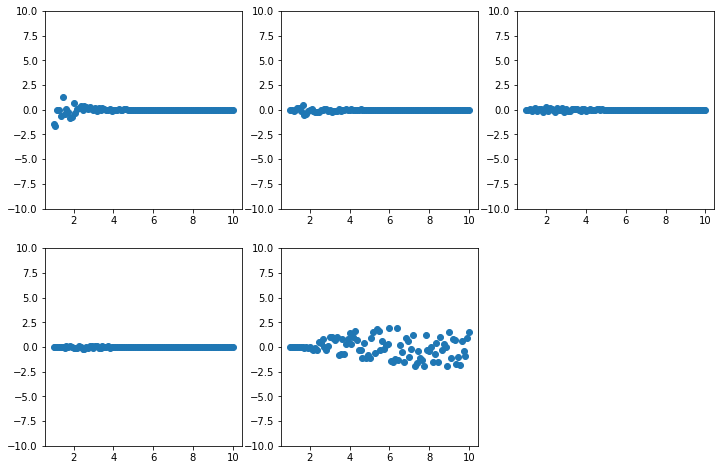

In [12]:
# Plot the result with separate plots for each species
columnNames = ["S1", "S2", "S3", "S4", "S5"]
fig = plt.figure(figsize=(12, 8))
numCol = 3
numRow = 2
# Use a customized plotting grid to avoid getting an empty plot
spec = gridspec.GridSpec(ncols=numCol, nrows=numRow, figure=fig)
# Do the plot
times = residualsArr[:, 0]
for idx, name in enumerate(columnNames):
    if idx < numCol:
        irow = 0
        icol = idx
    else:
        irow = 1
        icol = idx - numCol
    ax = fig.add_subplot(spec[irow, icol])
    ax.scatter(times, residualsArr[:, idx+1])
    title = name[1:-1] # Delete the square brackets around the species name
    ax.set_title(title)
    ax.set_ylim([-10, 10])

## (2) Evaluate possible fits for k1

In [13]:
k1Vals = [n*0.2 for n in range(21)]
parameterName = "k1"
rsqDct = {} # Container for the simulation results
for k1Val in k1Vals:
    parameterDct = dict(PARAMETER_DCT)
    parameterDct[parameterName] = k1Val
    residualsArr = calcResiduals(LINEAR_PATHWAY_MODEL, LINEAR_PATHWAY_ARR,
                                 parameterDct)
    rsqDct[k1Val] = sum(sum(residualsArr**2))

In [14]:
# Look at the result
rsqDct

{0.0: 19086.484006419174,
 0.2: 6556.518315938366,
 0.4: 4544.02587680233,
 0.6000000000000001: 4020.6562676528015,
 0.8: 3858.671270650337,
 1.0: 3818.7678452090317,
 1.2000000000000002: 3827.3999717264733,
 1.4000000000000001: 3856.4648285229077,
 1.6: 3893.7902333276493,
 1.8: 3933.7173105716984,
 2.0: 3973.5290813284473,
 2.2: 4011.9280836959592,
 2.4000000000000004: 4048.331829994884,
 2.6: 4082.5268176385393,
 2.8000000000000003: 4114.490930487699,
 3.0: 4144.299432111724,
 3.2: 4172.074291651174,
 3.4000000000000004: 4197.956511551074,
 3.6: 4222.091075608333,
 3.8000000000000003: 4244.6188687475005,
 4.0: 4265.673103645444}

In [15]:
list(rsqDct.keys())

[0.0,
 0.2,
 0.4,
 0.6000000000000001,
 0.8,
 1.0,
 1.2000000000000002,
 1.4000000000000001,
 1.6,
 1.8,
 2.0,
 2.2,
 2.4000000000000004,
 2.6,
 2.8000000000000003,
 3.0,
 3.2,
 3.4000000000000004,
 3.6,
 3.8000000000000003,
 4.0]

Text(0.5, 1.0, 'Evaluation of k1 fits')

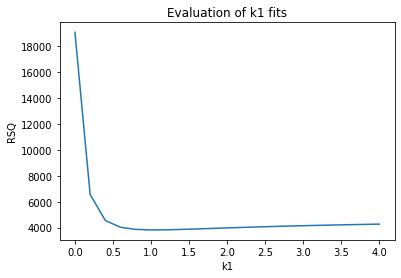

In [16]:
# Construct a plot
plt.plot(list(rsqDct.keys()), list(rsqDct.values()))
plt.xlabel("k1")
plt.ylabel("RSQ")
plt.title("Evaluation of k1 fits")

The true parameter value occurs at the ``k1`` value that has the lowest RSQ, about 1.0.

## (3) Simple Fitting Algorithm

    resultDct = {}
    for values in possibleValueAssignments
        parameterDct = assign values to parameters
        rsq = sum(calculateResiduals(parameterDct)
        resultDct[parameterDct] = rsq
    fittedParameters = parameterDct in resultDct that minimizes rsq
            

For $N$ parameters each of which has $M$ different values to explore (levels), the ``for`` loop iterates $M^N$ times.
For example, if there are 10 parameters each with 10 values, this is $10^{10}$!

# Exercise 2: Optimization

1. Apply ``scipy.optimize.minimize`` to the ``LINEARY_PATHWAY_MODEL`` to find values of the parameters ``k1, k2, k3, k4`` that minimize the sum of squares of the residuals for ``LINEAR_PATHWAY_DF``. *Hint*: Create a function that takes as input the values of the parameters of ``LINEAR_PATHWAY_MODEL`` and outputs the sum of squares of the residuals.

2. Questions
    1. How well does gradient descent do? Differential evolution?
    1. What happens when you use large bounds, say an upper bound of 1,000?

## Function to minimize

We begin by constructing the function to minimize. This is the equivalent to the ``distance`` function in the ``Optimization`` notebook.
We take advantage of the ``calcResiduals`` function that
calculates the residuals for a simulation of ``LINEAR_PATHWAY_MODEL``.

In [17]:
def functionToMinimize(parameterValues):
    """
    Parameters
    ----------
    parameterValues: list-float
        k1, k2, k3, k4
    """
    parameterDct = {"k%d" % (n + 1): parameterValues[n] for n in range(len(parameterValues))}
    residualsArr = calcResiduals(LINEAR_PATHWAY_MODEL, LINEAR_PATHWAY_ARR, parameterDct)
    return np.sum(residualsArr**2)

# TESTS
ssr1 = functionToMinimize([1, 2, 3, 4])
ssr2 = functionToMinimize([1, 1,  1, 1])
assert(ssr2 > ssr1)

## Do the minimization

In [18]:
from scipy.optimize import LinearConstraint

eye2Mat = np.identity(4) # Two dimensional identity matrix

constraints = LinearConstraint(eye2Mat, [0, 0, 0 , 0], [10, 10, 10, 10]),

In [19]:
# Optimization using gradient descent
from scipy.optimize import minimize

res = minimize(
    functionToMinimize,
    constraints=constraints,
    x0=(0, 0, 0, 0),
)

res.x

array([1.01353389, 2.15813251, 3.07941398, 4.28038936])

In [20]:
# Optimization using differential evolution
from scipy.optimize import differential_evolution

bounds = [(0, 10) for _ in range(4)]

res = differential_evolution(
    functionToMinimize,
    bounds=bounds,
)

res.x

array([1.0135383 , 2.15815573, 3.07933654, 4.28020286])

## Specific questions
1. Both gradient descent and differential evolution return resonable estimates of parameter values.
1. Larger bounds, like 1000, result in really bad parameter estimates.

# Exercise 3: Fitting Glycolytic Oscillations

This exercise is about fitting parameters in the Wolf model for glycolytic oscillations.
The model is ``WOLF_MODEL`` and the observational data for this model are ``WOLF_DF``.

1. Implement a ``doFit`` function that encapsulates the workflow for the Wolf model.
1. Try fitting the model using ``WOLF_PARAMETERS``. First try ``leastSquares`` (a graident descent method) and then ``differential_evolution``. How did the two methods differ as to fitting time and quality? Why? What would you try next to get better fits?
1. Limit the parameter values so that the upper value is twice the true value. Try fits using leastsqs and differential evolution.

In [21]:
print(WOLF_MODEL)

// Created by libAntimony v2.12.0.3
model *Jana_WolfGlycolysis()

  // Compartments and Species:
  compartment compartment_;
  species Glucose in compartment_, fructose_1_6_bisphosphate in compartment_;
  species glyceraldehyde_3_phosphate in compartment_, glycerate_3_phosphate in compartment_;
  species pyruvate in compartment_, Acetyladehyde in compartment_, External_acetaldehyde in compartment_;
  species ATP in compartment_, ADP in compartment_, NAD in compartment_, NADH in compartment_;
  species $External_glucose in compartment_, $ethanol in compartment_, $Glycerol in compartment_;
  species $Sink in compartment_;

  // Reactions:
  J0: $External_glucose => Glucose; J0_inputFlux;
  J1: Glucose + 2 ATP => fructose_1_6_bisphosphate + 2 ADP; J1_k1*Glucose*ATP*(1/(1 + (ATP/J1_Ki)^J1_n));
  J2: fructose_1_6_bisphosphate => glyceraldehyde_3_phosphate + glyceraldehyde_3_phosphate; J2_k*fructose_1_6_bisphosphate;
  J3: glyceraldehyde_3_phosphate + NADH => NAD + $Glycerol; J3_k*glyceralde

In [22]:
# Parameter ranges and initial value
upper = 1e5
WOLF_PARAMETERS = [
      SBstoat.Parameter("J1_k1", lower=0, value=1, upper=upper), #550
      SBstoat.Parameter("J1_Ki", lower=0, value=1, upper=upper), #1
      SBstoat.Parameter("J1_n", lower=0, value=1, upper=upper), #4
      SBstoat.Parameter("J2_k", lower=0, value=1, upper=upper), #9.8
      SBstoat.Parameter("J3_k", lower=0, value=1, upper=upper), #85.7
      SBstoat.Parameter("J4_kg", lower=0, value=1, upper=upper), #323.8
      SBstoat.Parameter("J4_kp", lower=0, value=1, upper=upper), #76411.1
      SBstoat.Parameter("J4_ka", lower=0, value=1, upper=upper), #57823.1
      SBstoat.Parameter("J4_kk", lower=0, value=1, upper=upper), #23.7
      SBstoat.Parameter("J5_k", lower=0, value=1, upper=upper), #80
      SBstoat.Parameter("J6_k", lower=0, value=1, upper=upper), #9.7
      SBstoat.Parameter("J7_k", lower=0, value=1, upper=upper), #2000
      SBstoat.Parameter("J8_k1", lower=0, value=1, upper=upper), #375
      SBstoat.Parameter("J8_k2", lower=0, value=1, upper=upper), #375
      SBstoat.Parameter("J9_k", lower=0, value=1, upper=upper), #28
      SBstoat.Parameter("J10_k", lower=0, value=1, upper=upper), #80                                                                                                                                                                          
]

## (1) Encapsulate workflow

As before, we encapsulate our workflow in a ``doFit`` function. There is one subtly included here - the argument to ``fitModel``
has ``max_nfev`` set to ``None``. This value is passed to ``lmfit``, and instruct those codes to use an unlimited number
of iterations to converge.
This is useful in more complex models, but it can come at the cost of increased computation times.

In [23]:
def doFit(endTime=5, fitterMethods=["leastsq"], parametersToFit=WOLF_PARAMETERS,
          isTest=False):
    """
    Fit the Wolf Model.

    Parameters
    ----------
    endTime: float
    fitterMethods: list-str
    parametersToFit: list-SBstoat.Parameter

    Returns
    -------
    ModelFitter
    """
    model = te.loada(WOLF_MODEL)
    observedTS = NamedTimeseries(dataframe=WOLF_DF)
    # Find the last index to use
    lastIdx = len([t for t in observedTS[TIME] if t <= endTime])
    observedTS = observedTS[:lastIdx]
    # Construct the fitter and do the fit
    fitter = ModelFitter(model, observedTS, fitterMethods=fitterMethods, 
                         parametersToFit=parametersToFit)
    fitter.fitModel()
    if not isTest:
        print(fitter.reportFit())
        fitter.plotFitAll(figsize=(24,16), numCol=2, color=["red", "blue"])
    return fitter

# TESTS
result = doFit(isTest=True)
assert(isinstance(result, ModelFitter))


82.688365:     (Roadrunner exception: : CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double))


## (2) Fit model


88.189178:     (Roadrunner exception: : CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double))
[[Variables]]
    J1_k1:  53.285699465880846
    J1_Ki:  124.9398334345969
    J1_n:  57.06034389084393
    J2_k:  10.535114829302485
    J3_k:  24.675700186174687
    J4_kg:  46.0437508930642
    J4_kp:  867.4810262813281
    J4_ka:  1091.520000569198
    J4_kk:  0.6944612646372184
    J5_k:  72.65739745629183
    J6_k:  9.743011450886495
    J7_k:  584.1656813010856
    J8_k1:  9.290167727834447
    J8_k2:  37.005542190643254
    J9_k:  30.325937571446296
    J10_k:  17.648580518673032
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 253
    # data points      = 5500
    # variables        = 16
    chi-square         = 26293.8913
    reduced chi-square = 4.79465559
    Akaike info crit   = 8637.23702

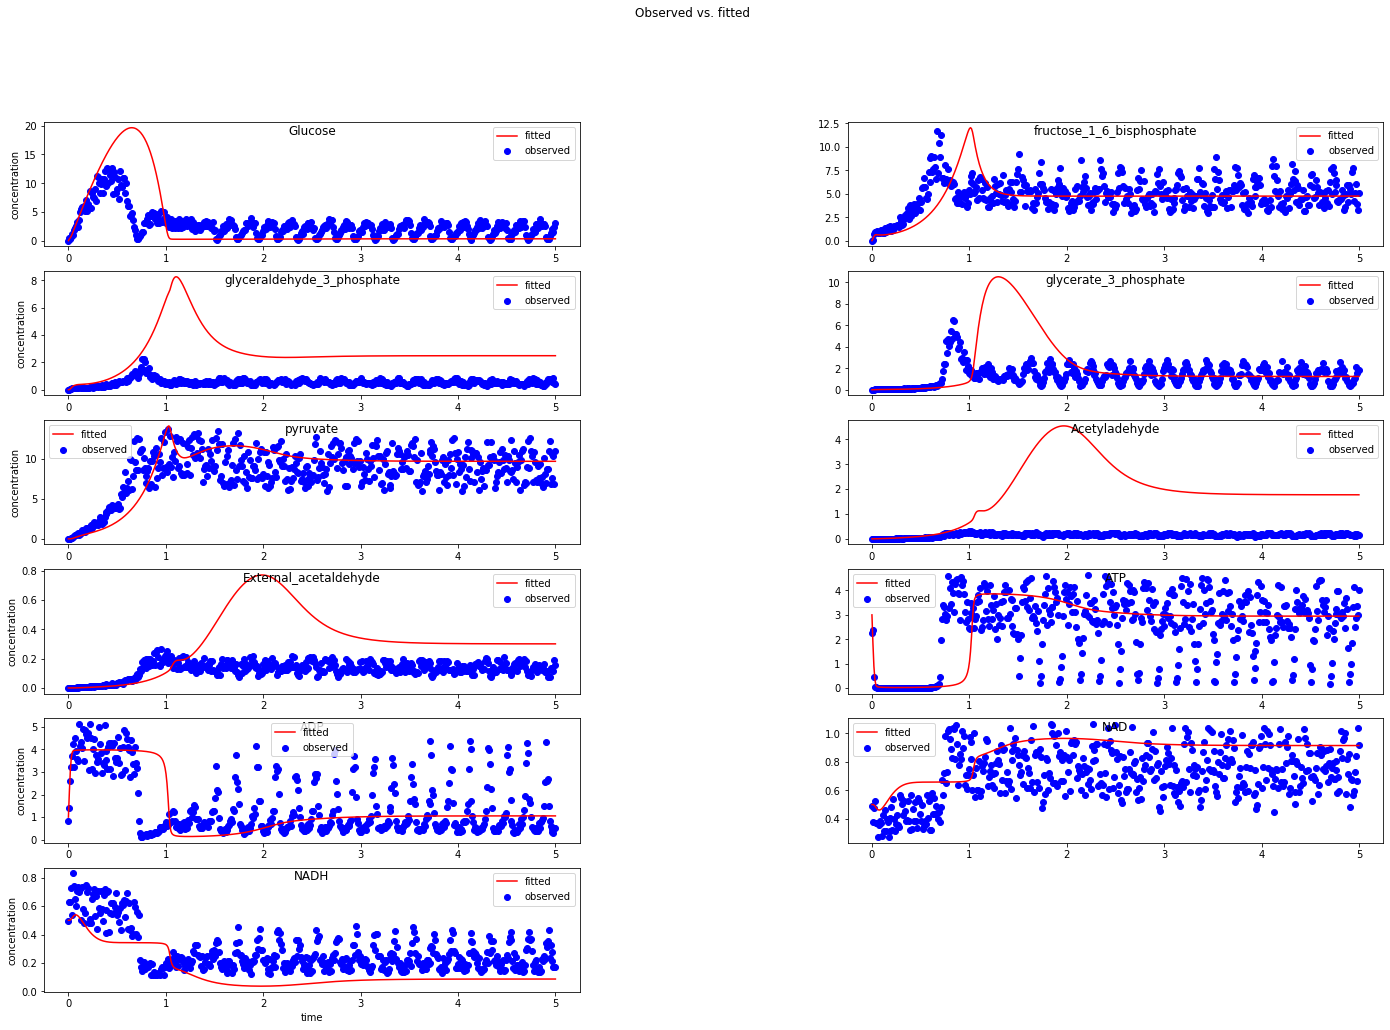

In [24]:
# Least squares fit
fitter = doFit(fitterMethods=["leastsq"])

Streaming output truncated to the last 5000 lines.
142.465267:     (Roadrunner exception: : CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double))

142.469153:     (Roadrunner exception: : CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double))

142.485463:     (Roadrunner exception: : CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double))

142.491868:     (Roadrunner exception: : CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timeste

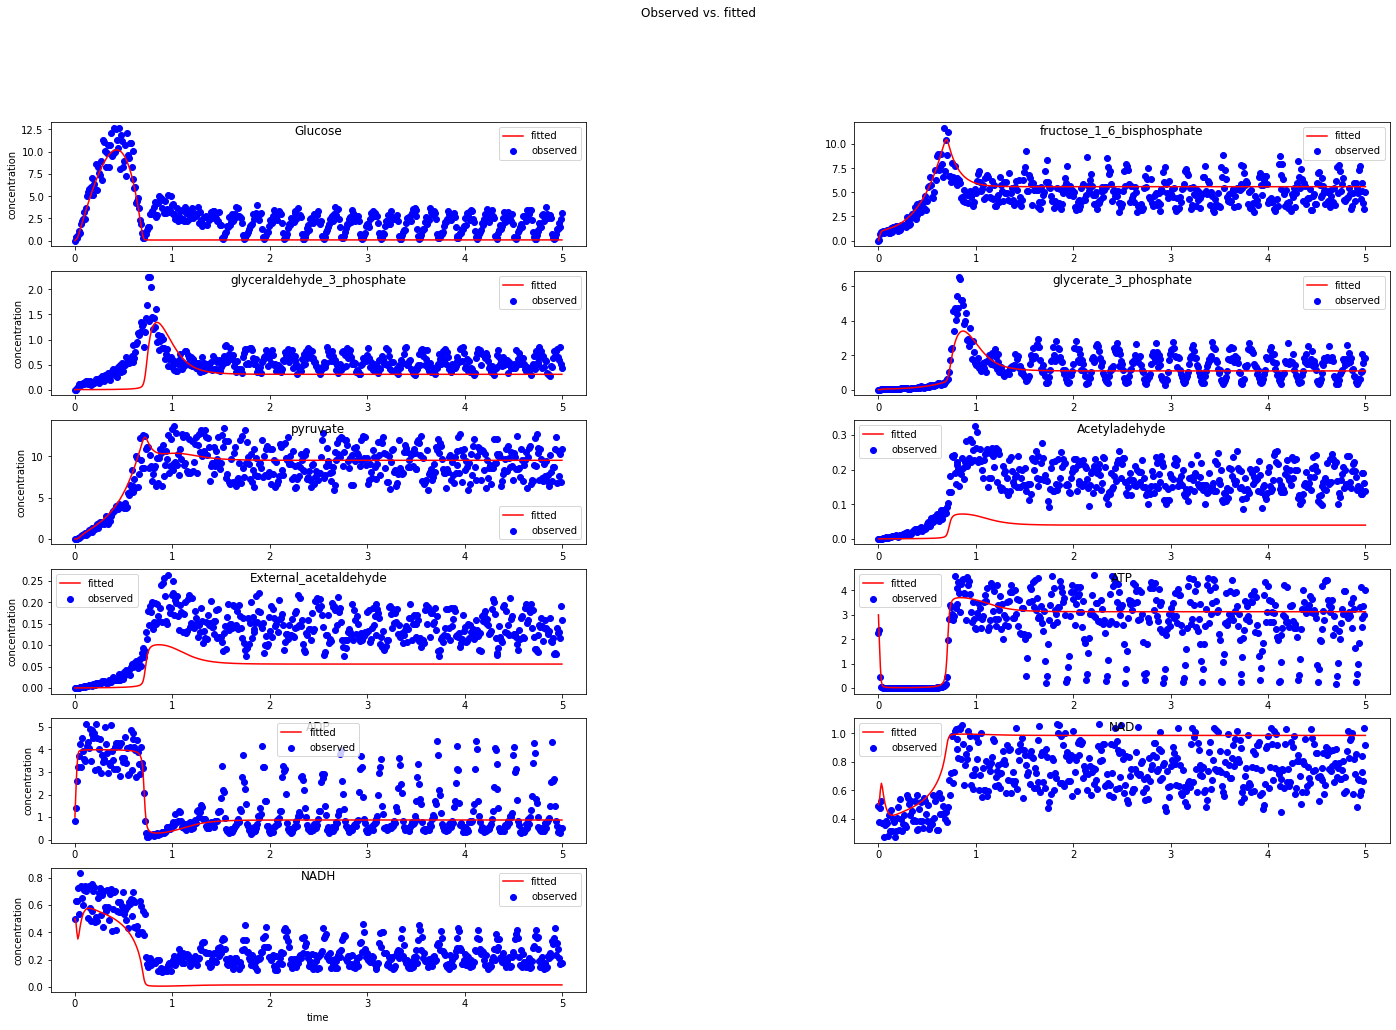

In [25]:
# Differential evolution
doFit(fitterMethods=["differential_evolution"])

### Questions
1. Differential evoluation takes a lot longer than leastsq. Neither method produced partiularly good fits, especially for the oscillations.

1. We'd probably want to limit the parameter ranges of each parameter based on the scientific literature.

## (3) Limit parameter ranges

In [ ]:
parametersToFit = [
      SBstoat.Parameter("J1_k1", lower=0, value=1, upper=1100), #550
      SBstoat.Parameter("J1_Ki", lower=0, value=1, upper=2), #1
      SBstoat.Parameter("J1_n", lower=0, value=1, upper=8), #4
      SBstoat.Parameter("J2_k", lower=0, value=1, upper=20), #9.8
      SBstoat.Parameter("J3_k", lower=0, value=1, upper=160), #85.7
      SBstoat.Parameter("J4_kg", lower=0, value=1, upper=660), #323.8
      SBstoat.Parameter("J4_kp", lower=0, value=1, upper=150000), #76411.1
      SBstoat.Parameter("J4_ka", lower=0, value=1, upper=110000), #57823.1
      SBstoat.Parameter("J4_kk", lower=0, value=1, upper=46), #23.7
      SBstoat.Parameter("J5_k", lower=0, value=1, upper=160), #80
      SBstoat.Parameter("J6_k", lower=0, value=1, upper=20), #9.7
      SBstoat.Parameter("J7_k", lower=0, value=1, upper=4000), #2000
      SBstoat.Parameter("J8_k1", lower=0, value=1, upper=750), #375
      SBstoat.Parameter("J8_k2", lower=0, value=1, upper=750), #375
      SBstoat.Parameter("J9_k", lower=0, value=1, upper=56), #28
      SBstoat.Parameter("J10_k", lower=0, value=1, upper=160), #80                                                                                                                                                                          
]

In [ ]:
doFit(fitterMethods=["leastsqs"], parametersToFit=parametersToFit)

In [ ]:
doFit(fitterMethods=["differential_evolution"], parametersToFit=parametersToFit)